## Ejemplo regresión logística

In [100]:
# importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
#cargamos la data y visualizamos las primeras 5 filas
df = pd.read_csv("diabetes.csv")
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [60]:
# seleccionamos edad y nivel de glucosa para X y diabetes para y
X = df.iloc[:, [6]]
y = df.iloc[:, 8].values

In [62]:
# se separan los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

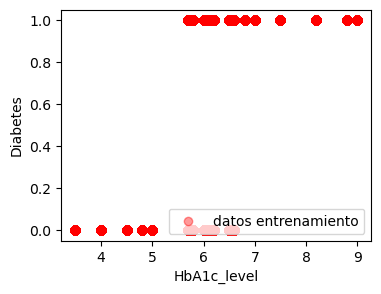

In [63]:
plt.figure(figsize=(4,3))
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.legend(loc='lower right')
plt.xlabel(r'HbA1c_level')
plt.ylabel(r'Diabetes')
plt.show()

In [64]:
# se separan los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [65]:
X_train.shape

(80000, 1)

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000) 
#Ajustando el modelo a los conjuntos de entrenamiento y prueba 
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [67]:
#Puntuación de exactitud del modelo de regresión logística 
print("La exactitud del modelo es: ", lr.score(X_test, y_test))

La exactitud del modelo es:  0.9411


In [79]:
W0 = lr.intercept_[0]
W1 = lr.coef_[0][0]
W0, W1

(-17.192386961010996, 2.4032495630936825)

C:\Users\Carlos Pineda\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


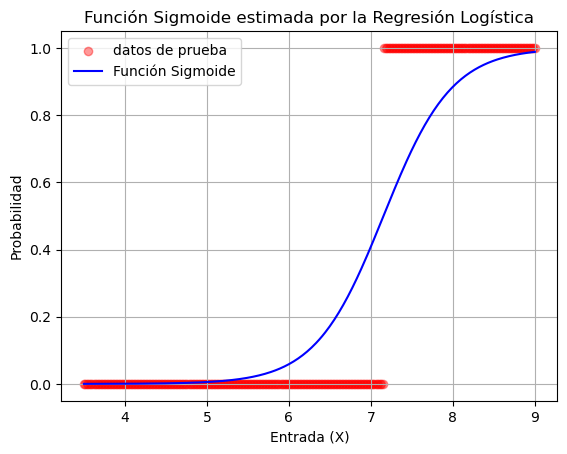

In [99]:
W0 = lr.intercept_[0]
W1 = lr.coef_[0][0]
y_pred = lr.predict(X_test.reshape(-1,1))

sigmoide = 1 / (1 + np.exp(-(w0 + w1 * X_test)))  # Función sigmoide

# Graficar la función logit
plt.scatter(X_test, y_pred,  color='red',alpha=0.4,label=r'datos de prueba')
plt.plot(X_test, sigmoide.reshape(-1,1), label="Función Sigmoide", color='blue')
plt.xlabel("Entrada (X)")
plt.ylabel("Probabilidad")
plt.title("Función Sigmoide estimada por la Regresión Logística")
plt.legend()
plt.grid()
plt.show()

## Ejemplo de KNN

In [101]:
# seleccionamos edad y nivel de glucosa para X y diabetes para y
X = df.iloc[:, [1,7]].values
y = df.iloc[:, 8].values

In [104]:
# se separan los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [106]:
y_pred = knn.predict(X_test)
print(f"Exactitud: {accuracy_score(y_test, y_pred):.2f}")

Exactitud: 0.94


In [108]:
ejemplo = np.array([[50, 130]])

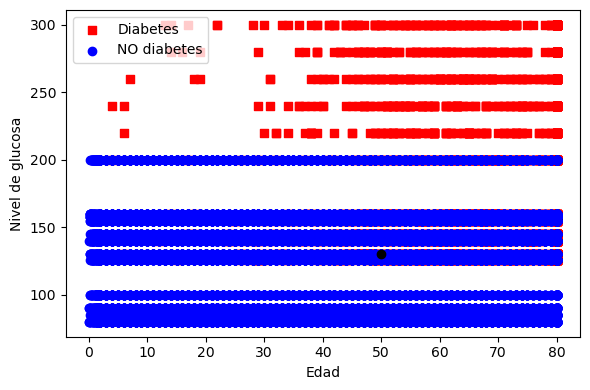

In [109]:
plt.figure(figsize=(6,4)) 
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='red', marker='s', label='Diabetes')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='blue', marker='o', label='NO diabetes')
plt.scatter(ejemplo[0][0],ejemplo[0][1], color = 'black')

plt.xlabel('Edad')
plt.ylabel('Nivel de glucosa')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [110]:
p = knn.predict(ejemplo)[0]
print(f"Predicción para la instancia de prueba: {'Diabetes' if p == 1 else 'No Diabetes'}")

Predicción para la instancia de prueba: No Diabetes


### Métricas de evaluación

In [111]:
#Exactitud
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.2f}")

Exactitud: 0.94


In [112]:
#Precisión
from sklearn.metrics import precision_score

precision = accuracy_score(y_test, y_pred)
print(f"Precisión: {precision:.2f}")

Precisión: 0.94


In [113]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)

Matriz de confusión:
 [[18111   203]
 [  998   688]]


In [114]:
# AUC y Curva ROC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilidades predichas para la clase positiva
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# AUC score
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {auc:.2f}")

AUC-ROC: 0.81


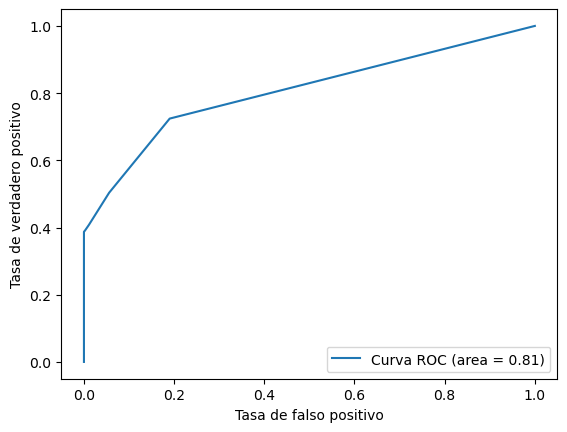

<Figure size 500x300 with 0 Axes>

In [115]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Curva ROC (area = %0.2f)" % auc)
plt.xlabel("Tasa de falso positivo")
plt.ylabel("Tasa de verdadero positivo")
plt.legend(loc="lower right")
plt.figure(figsize=(5,3))
plt.show()